In [ ]:
!pip install openai

In [ ]:
pip install openai==0.28

In [ ]:
from IPython.display import display, Image, Audio
import cv2
import base64
import time
import openai
import os
import requests

In [ ]:
# Set your API key
openai.api_key = ''

In [ ]:
!pip install --upgrade youtube-dl

In [ ]:
!youtube-dl -f 'best[ext=mp4]' https://www.youtube.com/watch?v=kQ_7GtE529M -o video.mp4

[youtube] kQ_7GtE529M: Downloading webpage
ERROR: Unable to extract uploader id; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


In [ ]:
!pip install pytube

In [ ]:
from pytube import YouTube

link = "https://www.youtube.com/watch?v=kQ_7GtE529M"
yt = YouTube(link)
stream = yt.streams.filter(file_extension='mp4').order_by('resolution').desc().first()
if stream:
    stream.download(filename='video.mp4')
else:
    print("No suitable video stream found.")

In [ ]:
import cv2
import base64

# Replace this with the path to your video file
video_path = "video.mp4"

# Set up video capture
video = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not video.isOpened():
    print("Error: Could not open video.")
    exit()

base64Frames = []
frame_count = 0  # Initialize a counter for the frames

while True:
    success, frame = video.read()
    if not success:
        break

    frame_count += 1  # Increment the frame counter

    # Encode the frame as JPEG and then convert it to base64
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()  # Release the video capture object

# Print the total number of frames read
print(frame_count, "frames read.")

# If frame_count is zero here, it typically means the video wasn't read correctly
if frame_count == 0:
    print("No frames were read from the video. Please check the video path and format.")


618 frames read.


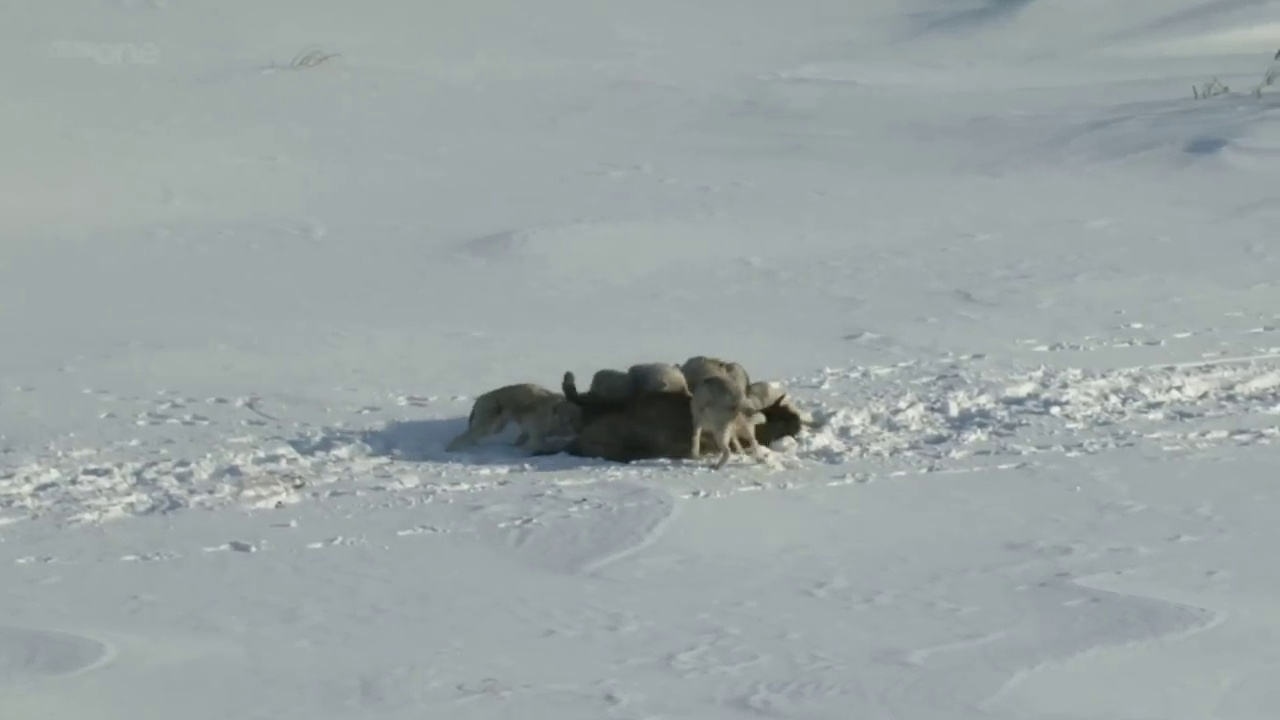

In [ ]:
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025)

In [ ]:
# Define a more concise and direct prompt
prompt_text = "Please summarize the key points from these video frames for an upload description."


selected_frames = [base64Frames[0], base64Frames[100]]

# Define your parameters including the model to use and the message to send
params = {
    "model": "text-davinci-003",  # Ensure this is the correct model
    "messages": [
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt_text},

        {"role": "user", "content": "Frame 0: [data for frame 0]"},
        {"role": "user", "content": "Frame 100: [data for frame 100]"}
    ],
    "max_tokens": 10,
    "temperature": 0.5,

# Use the OpenAI API to get a completion based on your parameters
try:
    result = openai.ChatCompletion.create(**params)
    print(result['choices'][0]['message']['content'])
except Exception as e:
    print(f"Unexpected error: {e}")


Title: "A Harsh Winter's Tale: The Struggle for Survival"

Description:
Witness the raw power and drama of nature in this gripping video showcasing the life-and-death struggle between a herd of bison and a pack of wolves in a snow-clad wilderness. This intense encounter captures the dire challenges faced by wildlife in their quest for survival amidst the unyielding elements.

In the heart of a frostbitten landscape, watch as the determined wolves attempt to isolate and hunt down a member of the mighty bison herd. Each frame is filled with the suspense and struggle that define the wild: the bison's powerful resistance, the wolves’ strategic maneuvers, and the ultimate test of strength and endurance. As the snow flies beneath thundering hooves and paws, the unyielding will to live commands every move.

In this battle of giants, life hangs in a delicate balance. This digitally-captured, raw interaction reminds us of the beauty and brutality of the natural world. It's
